<a href="https://colab.research.google.com/github/imeneAdded/hello-world/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


Data Collection and Analysis

In [3]:
# loading the data from a csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
#getting some info 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column and Spendingscore column

In [10]:
X = customer_data.iloc[:,[3,4]].values


Choosing the number of clusters

WCSS -- > within clusters sum of squares

In [12]:
#finding wcss for different number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

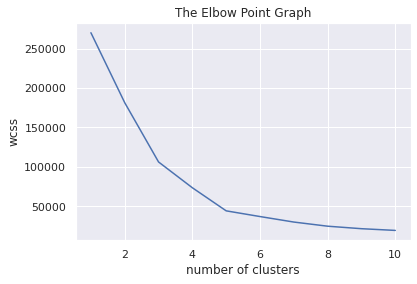

In [13]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Optimum number of clusters = 5

Training theK-Means Clustering Model

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

Text(0, 0.5, 'Spending Score')

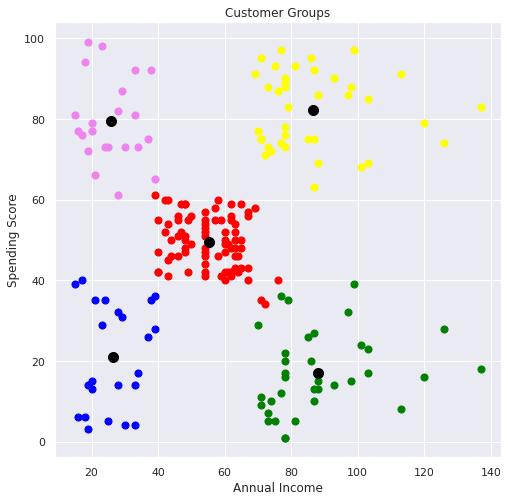

In [18]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8, 8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids' )
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
